In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Download dataset DataProject_raw.xlsx and save where you like, then input path below 
#(remember to replace '\' with '\\' or '/' in the path):

#We import data on PL season 2022/2023: Data contains all matches with actual outcome and xG recorded.

dfxG = pd.read_excel('C:/Users/kaspe/.vscode/projects-2024-rune-co/projects-2024-rune-co/dataproject/DataProject_raw.xlsx', sheet_name='xG')

dfShots = pd.read_excel('C:/Users/kaspe/.vscode/projects-2024-rune-co/projects-2024-rune-co/dataproject/DataProject_raw.xlsx', sheet_name='Shots')

df = pd.merge(dfxG, dfShots, on=['Home', 'Away'])

print(df)

     Wk            Home HomexG Score AwayxG             Away  HS  AS  FTHG  \
0     1  Crystal Palace    1.2   0–2      1          Arsenal  10  10     0   
1     1          Fulham    1.2   2–2    1.2        Liverpool   9  11     2   
2     1       Tottenham    1.5   4–1    0.5      Southampton  18  10     4   
3     1   Newcastle Utd    1.7   2–0    0.3  Nott'ham Forest  23   5     2   
4     1    Leeds United    0.8   2–1    1.3           Wolves  12  15     2   
..   ..             ...    ...   ...    ...              ...  ..  ..   ...   
375  38         Everton      1   1–0    0.5      Bournemouth  13   7     1   
376  38  Leicester City    1.4   2–1    1.4         West Ham  13  16     2   
377  38     Aston Villa    2.8   2–1    1.4         Brighton  12   8     2   
378  38    Leeds United    1.5   1–4    2.2        Tottenham  19  11     1   
379  38       Brentford    1.3   1–0    1.6  Manchester City  11  17     1   

     FTAG  
0       2  
1       2  
2       1  
3       0  
4  

In [14]:
#Because of data limitations, we have to assume that all shots for a team in a game have the same xG, 
#such that xG_pr_shot * total_shots = total_xG.:
df['HomexGShot'] = df['HomexG']/df['HS']
df['AwayxGShot'] = df['AwayxG']/df['AS']

#We calculate actual points gained for home team (HP) and away team (AP) (3 for victory, 1 for draw, 0 for loss):
df["HP"] = 3*(df['FTHG']>df['FTAG']) + (df['FTHG']==df['FTAG'])
df["AP"] = 3*(df['FTAG']>df['FTHG']) + (df['FTHG']==df['FTAG'])

#And finally we calculate the goal differences:
df['HGD'] = df['FTHG'] - df['FTAG']
df['AGD'] = df['FTAG'] - df['FTHG']

print(df)

     Wk            Home HomexG Score AwayxG             Away  HS  AS  FTHG  \
0     1  Crystal Palace    1.2   0–2      1          Arsenal  10  10     0   
1     1          Fulham    1.2   2–2    1.2        Liverpool   9  11     2   
2     1       Tottenham    1.5   4–1    0.5      Southampton  18  10     4   
3     1   Newcastle Utd    1.7   2–0    0.3  Nott'ham Forest  23   5     2   
4     1    Leeds United    0.8   2–1    1.3           Wolves  12  15     2   
..   ..             ...    ...   ...    ...              ...  ..  ..   ...   
375  38         Everton      1   1–0    0.5      Bournemouth  13   7     1   
376  38  Leicester City    1.4   2–1    1.4         West Ham  13  16     2   
377  38     Aston Villa    2.8   2–1    1.4         Brighton  12   8     2   
378  38    Leeds United    1.5   1–4    2.2        Tottenham  19  11     1   
379  38       Brentford    1.3   1–0    1.6  Manchester City  11  17     1   

     FTAG HomexGShot AwayxGShot  HP  AP  HGD  AGD  
0       2  

In [15]:
#This will take 2-3 minutes to run. You can set n lower if you're impatient.

n = 10000
np.random.seed(1909)

#Now we simulate each match n times:
for index, row in df.iterrows():
    HomeShots = []
    for j in range(row['HS']):
        HomeShots.append(row["HomexGShot"]) #Array of shots (all with same xG, but method leaves open possibility of adding xG variation)
    
    AwayShots = []
    for j in range(row['AS']):
        AwayShots.append(row["AwayxGShot"]) #Array of shots

    #Initialize some variables:
    team1wins = 0
    draws = 0
    team2wins = 0

    for b in range(n):
        team1goals = 0
        team2goals = 0
        for j in range(len(HomeShots)):
            x = np.random.random()  #Generate a random var [0,1) for each shot
            if x < HomeShots[j]:
                team1goals += 1     #Goal if random var < than xG of shot
        for k in range(len(AwayShots)):
            y = np.random.random()
            if y < AwayShots[k]:
                team2goals += 1
        if team1goals > team2goals: #Get wins, draws and losses:
            team1wins += 1
        elif team1goals < team2goals:
            team2wins += 1
        else:
            draws += 1

    team1points = team1wins *3 + draws  #Get points
    team2points = team2wins *3 + draws
    
    df.loc[index,"HomexP"] = team1points/n  #Average points gained
    df.loc[index,"AwayxP"] = team2points/n

print(df)

     Wk            Home HomexG Score AwayxG             Away  HS  AS  FTHG  \
0     1  Crystal Palace    1.2   0–2      1          Arsenal  10  10     0   
1     1          Fulham    1.2   2–2    1.2        Liverpool   9  11     2   
2     1       Tottenham    1.5   4–1    0.5      Southampton  18  10     4   
3     1   Newcastle Utd    1.7   2–0    0.3  Nott'ham Forest  23   5     2   
4     1    Leeds United    0.8   2–1    1.3           Wolves  12  15     2   
..   ..             ...    ...   ...    ...              ...  ..  ..   ...   
375  38         Everton      1   1–0    0.5      Bournemouth  13   7     1   
376  38  Leicester City    1.4   2–1    1.4         West Ham  13  16     2   
377  38     Aston Villa    2.8   2–1    1.4         Brighton  12   8     2   
378  38    Leeds United    1.5   1–4    2.2        Tottenham  19  11     1   
379  38       Brentford    1.3   1–0    1.6  Manchester City  11  17     1   

     FTAG HomexGShot AwayxGShot  HP  AP  HGD  AGD  HomexP  Away

In [16]:
homesum_df = df.groupby('Home').agg({'HomexP':'sum','HP':'sum','HGD':'sum','FTHG':'sum'}).reset_index() 
awaysum_df = df.groupby('Away').agg({'AwayxP':'sum','AP':'sum','AGD':'sum','FTAG':'sum'}).reset_index()

sums_df = pd.merge(homesum_df, awaysum_df, left_on='Home', right_on='Away')
sums_df['Exp. Points'] = sums_df['HomexP'] + sums_df['AwayxP']
sums_df['Points'] = sums_df['HP'] + sums_df['AP']
sums_df['Goal Diff.'] = sums_df['HGD'] + sums_df['AGD']
sums_df['Goals'] = sums_df['FTHG'] + sums_df['FTAG']

#Sort table and add interesting stuff
sums_df_sorted = sums_df.sort_values(by=['Points', 'Goal Diff.', 'Goals'], ascending=[False, False, False])
sums_df_sorted['Actual pos.'] = sums_df.reset_index().index + 1
sums_df['Actual pos.'] = sums_df_sorted['Actual pos.']
sums_df['Difference'] = sums_df['Exp. Points'] - sums_df['Points']
sums_df['Exp. Points'] = sums_df['Exp. Points'].round(1)
sums_df['Difference'] = sums_df['Difference'].round(1)
sums_df = sums_df.rename(columns={'Home': 'Team'}).drop(columns=['Away','HomexP','AwayxP','FTHG','FTAG','HP','AP','HGD','AGD','Goals','Goal Diff.']).sort_values(by='Exp. Points',ascending=False)

sums_df = sums_df.reset_index(drop=True)
sums_df.index += 1
print(sums_df)

               Team  Exp. Points  Points  Actual pos.  Difference
1   Manchester City         81.2      89            1        -7.8
2           Arsenal         70.2      84            2       -13.8
3     Newcastle Utd         69.6      71            4        -1.5
4          Brighton         66.9      62            6         4.9
5         Liverpool         66.8      67            5        -0.2
6    Manchester Utd         63.2      75            3       -11.8
7         Brentford         59.7      59            9         0.7
8         Tottenham         57.9      60            8        -2.1
9       Aston Villa         53.4      61            7        -7.6
10          Chelsea         52.8      44           12         8.8
11         West Ham         52.4      40           14        12.4
12   Crystal Palace         44.4      45           11        -0.5
13   Leicester City         44.1      34           18        10.1
14           Fulham         43.0      52           10        -9.0
15     Lee

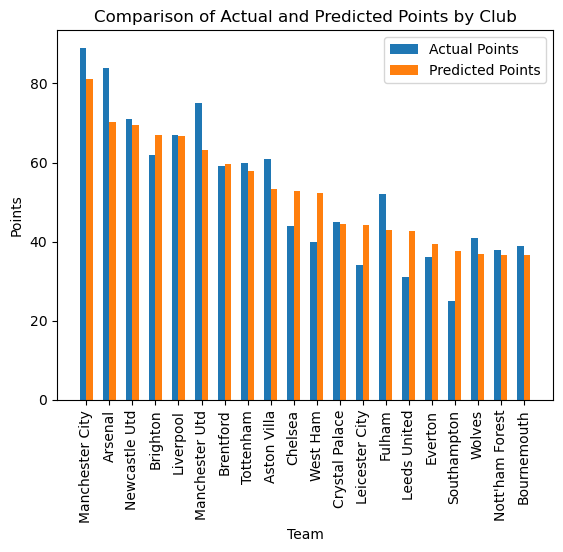

In [17]:
# Plotting
fig, ax = plt.subplots()
# Creating indices for each group of bars
indices = range(len(sums_df['Team']))

# Bar width
width = 0.3

# Plotting both actual and predicted points
actual_bars = ax.bar(indices, sums_df['Points'], width, label='Actual Points')
predicted_bars = ax.bar([p + width for p in indices], sums_df['Exp. Points'], width, label='Predicted Points')

# Adding labels, title, and legend
ax.set_xlabel('Team')
ax.set_ylabel('Points')
ax.set_title('Comparison of Actual and Predicted Points by Club')
ax.set_xticks([p + width / 2 for p in indices])
ax.set_xticklabels(sums_df['Team'], rotation=90)
ax.legend()

# Show the plot
plt.show()


Analyzing the results, it's apparent that there is a general correlation between the expected and actual points for the Premier League clubs in the 22/23 season. However, the results indicate that the top rankings are very "fair", while the buttom is less "fair". I.e. if each team were to achieve their expected points, then Nott'ham Forest, Wolves and Bounemouth would have been relegated instead of Leicester City, Leeds United and Southampton.
